c:\Users\Jagadeesh Varma I\Documents\poem_books\Poem_Generator\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


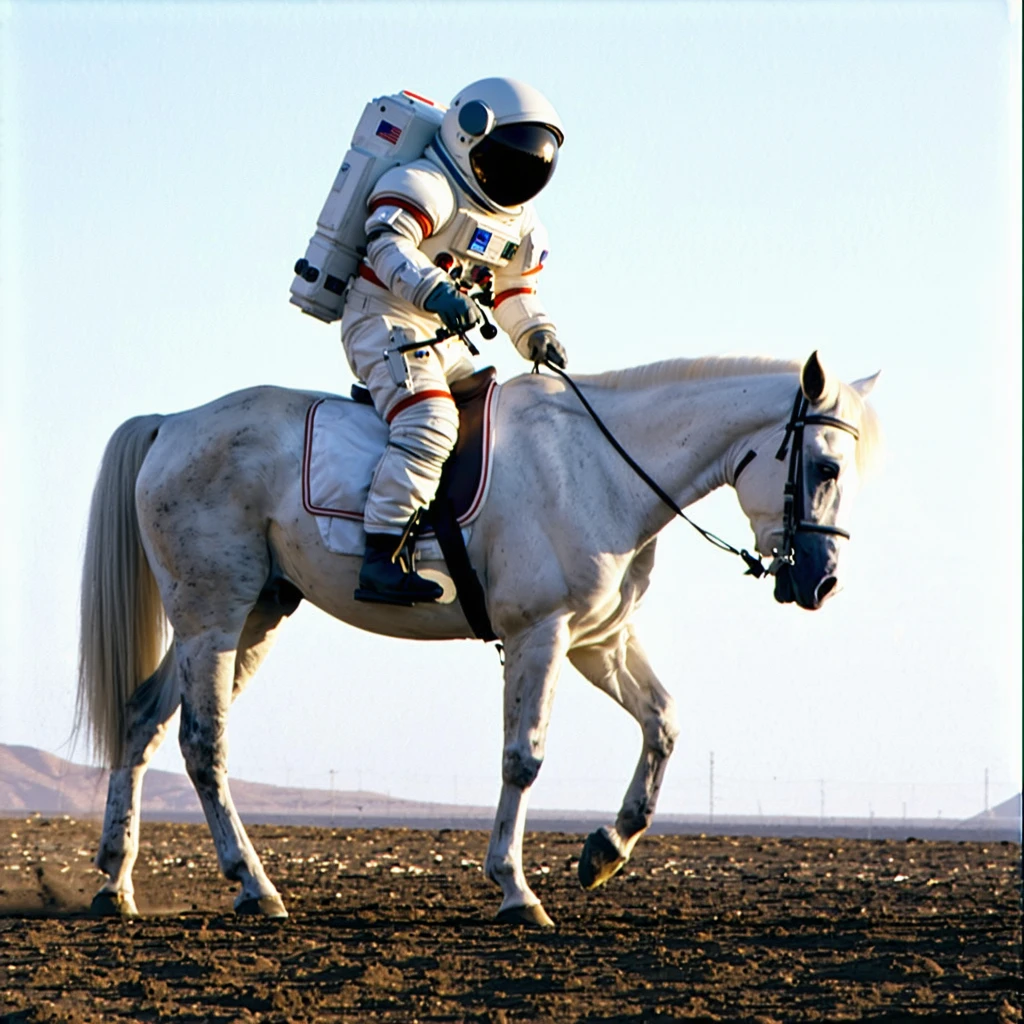

In [1]:
import os
from huggingface_hub import InferenceClient
from dotenv import load_dotenv
load_dotenv()
from PIL import Image
from IPython.display import display

client = InferenceClient(
    provider="replicate",
    api_key=os.environ["HF_TOKEN"],
)

# output is a PIL.Image object
image = client.text_to_image(
    "Astronaut riding a horse",
    model="stabilityai/stable-diffusion-3.5-large",
)

# Display the generated image
display(image)

In [ ]:
import os
from huggingface_hub import InferenceClient
from PIL import Image
from IPython.display import display

client = InferenceClient(
    provider="replicate",
    api_key=os.environ["HF_TOKEN"],
)

# output is a PIL.Image object
image = client.text_to_image(
    "Astronaut riding a horse",
    model="stabilityai/stable-diffusion-3.5-large",
)

# Display the generated image
display(image)

# Poem & Story Generator Project

This project automatically generates illustrated children's stories and compiles them into beautiful PDFs using AI language and image models. You only need to provide a list of story themes (in Excel), and the app will do the rest!

---

## 📦 Project Structure

- `data/input/` — Place your input files here (e.g., Excel file with story themes)
- `data/output/` — Generated stories, images, and PDFs will appear here
- `src/` — Source code for story, image, and PDF generation
- `config/` — Configuration files (like `config.yaml`)
- `app/` — Streamlit web app for easy use
- `requirements.txt` — List of required Python packages
- `.env` — Your API keys (not included for security)

---

## 🚀 Quick Start (No Coding Needed!)

### 1. Install Python
- Download and install Python 3.9 or newer from [python.org](https://www.python.org/downloads/).

### 2. Download the Project
- Download this project as a ZIP file and extract it, or clone it using Git:
  ```bash
  git clone <repo-url>
  ```

### 3. Open a Terminal (Command Prompt or PowerShell)
- Navigate to the project folder:
  ```bash
  cd path/to/Poem_Generator
  ```

### 4. Install Required Packages
- Run this command:
  ```bash
  pip install -r requirements.txt
  ```

### 5. Set Up API Keys
- Create a file named `.env` in the project folder.
- Add your HuggingFace API key (get one from https://huggingface.co/settings/tokens):
  ```env
  HF_TOKEN=your_huggingface_token_here
  ```
- (Optional) Add other API keys if needed for text generation.

### 6. Configure Settings
- Edit `config/config.yaml` to adjust output folders or other settings if needed.

### 7. Prepare Your Input
- Create an Excel file (e.g., `themes.xlsx`) with a column listing your story themes (one theme per row).
- Place it in `data/input/` or upload it via the app.

---

## 🖥️ Using the Streamlit Web App (Recommended)

1. In your terminal, run:
   ```bash
   streamlit run app/main.py
   ```
2. A web page will open. Follow the on-screen instructions:
   - Upload your Excel file with story themes.
   - Click the button to generate stories, images, and PDFs.
   - Download or view the generated PDFs directly from the app.

---

## 🛠️ Running from the Command Line (Advanced)

If you prefer, you can run the scripts directly:

- **Generate stories:**
  ```bash
  python src/story_generator/story_generator.py
  ```
- **Generate images:**
  ```bash
  python src/image_generator/image_generator.py
  ```
- **Generate PDFs:**
  ```bash
  python src/pdf_generator/pdf_generator.py
  ```

---

## ❓ FAQ

**Q: I get a `ModuleNotFoundError` for `src` or `utils`.**
- Always run scripts from the project root folder (where `src/` is located).
- Or use the Streamlit app, which handles paths for you.

**Q: Where do my results go?**
- Stories, images, and PDFs are saved in `data/output/` subfolders.

**Q: How do I get an API key?**
- Sign up at [huggingface.co](https://huggingface.co/), go to your settings, and create a new token.

**Q: Can I use my own story themes?**
- Yes! Just put them in an Excel file and upload via the app or place in `data/input/`.

---

## 🤗 Credits
- Built with [Streamlit](https://streamlit.io/), [HuggingFace](https://huggingface.co/), and [ReportLab](https://www.reportlab.com/).
- Created by [Your Name].

---

## 📝 License
This project is for educational and personal use. Please check the licenses of any AI models or APIs you use.
